In [1]:
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

 'Oz'
[' 1501862379.395' ' 1501862443.414' ' 1501862507.418' ' 1501862571.421'
 ' 1501862635.425']
[' 1501862394.396' ' 1501862458.415' ' 1501862522.419' ' 1501862586.422'
 ' 1501862650.426']
[' 1501862411.412' ' 1501862475.416' ' 1501862539.419' ' 1501862603.423'
 ' 1501862667.427']
[' 1501862426.413' ' 1501862490.417' ' 1501862554.42' ' 1501862618.424'
 ' 1501862682.428']
(7490,)
(7510,)
(7500,)
(7500,)
(7510,)
(7510,)
(7490,)
(7500,)
(7500,)
(7490,)


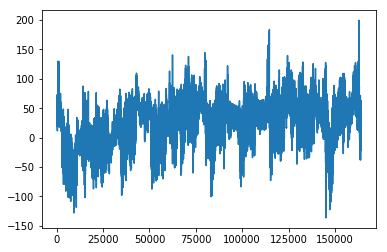

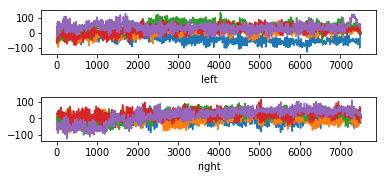

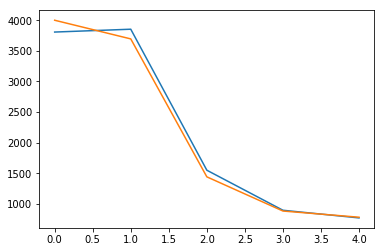

In [30]:
# Get all the values from the csv file to a numpy array and plot the complete Oz data
npDataOz, npDataOzTime = dataOzMeth()

# Store all the starting and ending time points and returns. Also, returns number of logs in the file
numberOfLogs, npStartTimesLeft, npEndTimesLeft, npStartTimesRight, npEndTimesRight = startEndTimes()

# This will store the average value over all trials
avgOverAllLogsLeft = np.array(500)
avgOverAllLogsRight = np.array(500)

for i in range(numberOfLogs):

    # Store corresponding index to the time points in an array. [setNum, startStopTimes]
    npLeftOneIndex, npRightOneIndex = indexesInOneSet(i, npStartTimesLeft, npEndTimesLeft, npStartTimesRight, npEndTimesRight, npDataOz, npDataOzTime)

    # plots the brain signal during one cycle (14 sec) of left and right
    npLeftOneValues, npRightOneValues = plotValuesAtIndex(npLeftOneIndex, npRightOneIndex)

    # Average the signal for one time period and then using FFT plot the signal, then returned the array which can be used to find avergae later
    avgOverAllLogsLeft = avgOverAllLogsLeft + averageOf14Times(npLeftOneValues)
    avgOverAllLogsRight = avgOverAllLogsRight + averageOf14Times(npRightOneValues)

# Avergae out the array over number of Logs
avgOverAllLogsLeft = avgOverAllLogsLeft / numberOfLogs
avgOverAllLogsRight = avgOverAllLogsRight / numberOfLogs

#Plot these avergaed out FFTs
fig1 = plt.figure(3)
plt.plot(avgOverAllLogsLeft[10:15])
plt.plot(avgOverAllLogsRight[10:15])

In [12]:
def dataOzMeth():
    file = open('SubjectMichelle__eeg.csv', 'r')
    file_reader = csv.reader(file)
    next(file_reader)
    next(file_reader)
    next(file_reader)
    next(file_reader)
    next(file_reader)
    next(file_reader)
    next(file_reader)
    next(file_reader)
    print(next(file_reader)[21])
    #next(file_reader)
    dataOz = []
    dataOzTime = []
    for line in file_reader:
        dataOz.append(line[21])
        dataOzTime.append(line[1])

    npDataOz = np.asarray(dataOz)
    npDataOz = npDataOz.astype(np.float64)
    
    npDataOzTime = np.asarray(dataOzTime)
    npDataOzTime = npDataOzTime.astype(np.float64)

    fig1 = plt.figure(1)
    plt.plot(npDataOz)
    
    return [npDataOz, npDataOzTime]

In [13]:
def startEndTimes():
    file = open('SubjectMichelle__log.txt', 'r')
    file_reader = csv.reader(file)
    next(file_reader)
    startTimesLeft = []
    startTimesRight = []
    endTimesLeft = []
    endTimesRight = []
    numberOfLogs = 0
    for line in file_reader:

        endLeft = "" + (line[0])
        a,b = endLeft.split(':', 1)
        endTimesLeft.append(b)

        startLeft = "" + (line[5])
        a,b = startLeft.split(':', 1)
        startTimesLeft.append(b)

        endRight = "" + (line[12])
        a,b = endRight.split(':', 1)
        endTimesRight.append(b)

        startRight = "" + (line[13])
        a,b = startRight.split(':', 1)
        startTimesRight.append(b)
        
        numberOfLogs = numberOfLogs + 1

    npStartTimesLeft = np.asarray(startTimesLeft)
    npStartTimesRight = np.asarray(startTimesRight)
    npEndTimesLeft = np.asarray(endTimesLeft)
    npEndTimesRight = np.asarray(endTimesRight)

    print(npStartTimesLeft)
    print(npEndTimesLeft)

    print(npStartTimesRight)
    print(npEndTimesRight)
    
    return [numberOfLogs, npStartTimesLeft, npEndTimesLeft, npStartTimesRight, npEndTimesRight]

In [21]:
def indexesInOneSet(setNum, npStartTimesLeft, npEndTimesLeft, npStartTimesRight, npEndTimesRight, npDataOz, npDataOzTime):
    index = 0
    leftOneIndex = []
    rightOneIndex = []
    for i in npDataOzTime:
        index = index + 1
        if float(i) < float(npEndTimesLeft[setNum]) and float(i) > float(npStartTimesLeft[setNum]):
            leftOneIndex.append(index)

        if float(i) < float(npEndTimesRight[setNum]) and float(i) > float(npStartTimesRight[setNum]):
            rightOneIndex.append(index)

    npLeftOneIndex = np.asarray(leftOneIndex)        
    npRightOneIndex = np.asarray(rightOneIndex)       
    
    return [npLeftOneIndex, npRightOneIndex]

In [15]:
def plotValuesAtIndex(npLeftOneIndex, npRightOneIndex):
    leftOneValues = []
    rightOneValues = []
    for i in npLeftOneIndex:
        leftOneValues.append(npDataOz[i])

    for i in npRightOneIndex:
        rightOneValues.append(npDataOz[i])

    npLeftOneValues = np.asarray(leftOneValues)
    npRightOneValues = np.asarray(rightOneValues)

    fig1 = plt.figure(2)
    plt.subplot(3,1,1)
    plt.subplots_adjust(wspace=1, hspace=1)
    plt.plot(npLeftOneValues)
    plt.xlabel('left')
    
    plt.subplot(3,1,2)
    plt.plot(npRightOneValues)
    plt.xlabel('right')
    
    print(np.shape(npLeftOneValues))
    print(np.shape(npRightOneValues))
    
    return [npLeftOneValues, npRightOneValues]

In [27]:
def averageOf14Times(npValues):
    avg = np.array(500)
    for i in range(14):
        x = np.fft.fft(npValues[i * 500:i * 500 + 500])
        avg = avg + np.abs(x)
    avg = avg / 14
    
    # Commented this out as now we are plotting one average figure of all Logs instead of seperate plot for each Log
    
    #fig1 = plt.figure(3)
    #plt.plot(avg[10:15])
    
    return avg